In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/AiQuest Datasets/02 Linear Regression Dataset/Dhaka Rent.csv', sep=";")

, sep=';' deyar karon dataset e ; sign ta remove hoye space hoye alada hoye jabe....

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


**Always mone rakhbe... y=target value/dependent value, x=feature value/independent value**

**x er multiple column thakte pare.... y er always single column thakbe**

**niche x & y er value ekbar drop diye set korechi.. porer ba df the specific column niye seta x & y e set kore head() implement kora hoi.... data represent er style different**

In [4]:
# x = feature values; y = target value
#
x = df.drop('rent', axis=1)

In [5]:
#df = df.drop('rent', axis=1) # avg process
#df.drop('rent', axis=1, inplace=True) # alternative way.. inplace=True howate rent column drop hoy update hoye automatic df keo update kore dibe

In [6]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


drop() use korate emn vabe data show hoyeche.. etake drop kora bole..

In [7]:
x.shape

(60, 1)

In [8]:
y = df.drop("area", axis=1)

In [9]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [10]:
# x = df['area']

In [11]:
# x.head()

In [12]:
# y = df['rent']

In [13]:
# y.head()

df the direct column name niye y e set korate emn vabe data show hoyeche... ektake select kora bole...

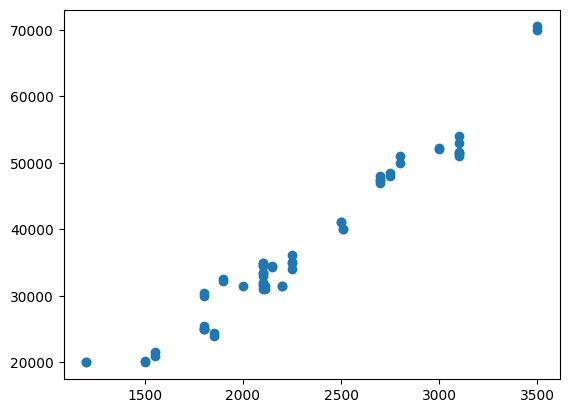

In [14]:
plt.scatter(x, y)

Text(0, 0.5, 'Rent in taka')

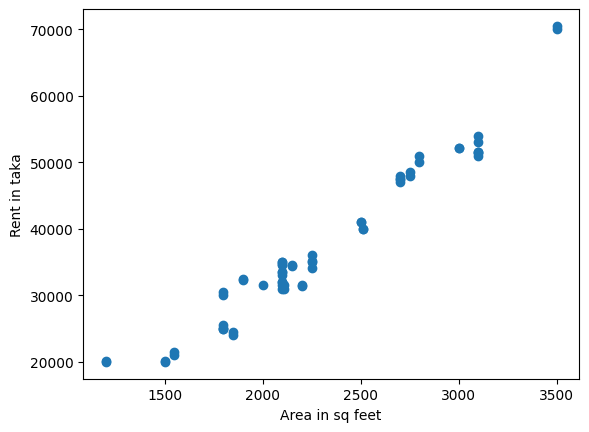

In [15]:
plt.scatter(x,y)
plt.xlabel("Area in sq feet")
plt.ylabel("Rent in taka")

In [16]:
x.mean()

area    2289.0
dtype: float64

In [17]:
y.mean()

rent    37269.166667
dtype: float64

# **Test Train Split, Accuracy, Random State**

****

In [18]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30) # ekhane test_size=0.30 mean... 30% data test er jonne rekhe baki 70% data train korate use hobe..

In [19]:
train.shape

(42, 2)

In [20]:
test.shape

(18, 2)

In [21]:
train.head()

,area,rent
54,2800,51000
20,2110,31500
49,2700,47500
34,3000,52200
27,1800,25000


In [22]:
test.head()

,area,rent
12,2100,34500
32,2500,41100
17,1550,21000
2,2500,41050
41,2100,32020


# **Seperate train and test for xtrain, xtest, ytrain, ytest**

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)

**random state: barbar code run korle train data change hoye jai... Seta prevent korte random_state use kore.. jate data fix theke.. random_state e jekono number use kora jai.. tobe ideal vabe 42 use kore hoi.. etar kono special meaning nei**

In [24]:
xtrain.shape

(42, 1)

In [25]:
xtest.shape

(18, 1)

In [26]:
ytrain.shape

(42, 1)

In [27]:
ytest.shape

(18, 1)

In [28]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [29]:
ytrain.head()

,rent
40,34400
4,52100
43,40000
19,47000
34,52200


# **Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [31]:
reg.fit(xtrain, ytrain) # fit function diye machine-learning model ke train korano hoi

LinearRegression()

In [32]:
reg.coef_

array([[20.68636687]])

In [33]:
reg.intercept_

array([-10252.90474034])

In [34]:
reg.predict([[3000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[51806.19587435]])

In [35]:
residual = 51806.1958743 - 52100

In [36]:
residual

-293.80412570000044

In [37]:
#Y = (M*X) + C
Y = ((reg.coef_)*3000) + (reg.intercept_)
Y

array([[51806.19587435]])

In [38]:
pred = reg.predict(xtest) #corresponded to ytrain
pred

array([[31119.82900279],
       [29051.19231563],
       [20776.64556701],
       [53874.83256151],
       [41669.87610729],
       [47668.92250004],
       [36291.42072068],
       [26982.55562848],
       [33188.46568994],
       [26982.55562848],
       [26982.55562848],
       [33395.32935866],
       [33188.46568994],
       [36291.42072068],
       [62149.37931013],
       [21810.96391059],
       [45600.28581288],
       [20776.64556701]])

**MSE & MAE**

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [40]:
mse = mean_squared_error(ytest, pred)
mse

7677066.248378809

In [41]:
mae = mean_absolute_error(ytest, pred)
mae

2103.50832336242

In [42]:
reg.score(xtest, ytest) #accuracy

0.9515542918540623

**Best fit line**

Text(0, 0.5, 'Rent in taka')

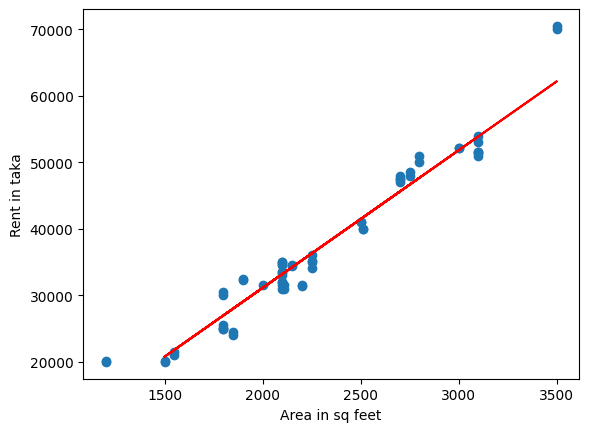

In [43]:
plt.plot(xtest, pred, color='red')
plt.scatter(x,y)
plt.xlabel("Area in sq feet")
plt.ylabel("Rent in taka")